In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle 

In [4]:
loaded_data = pickle.load(open('./SMAI-Dataset-problem-4.3/colors.pkl', 'rb'))
loaded_data.shape


(100, 2)

In [15]:
data_mean = np.mean(loaded_data, axis=0)
data_std = np.std(loaded_data, axis=0)
data = (loaded_data - data_mean)/data_std

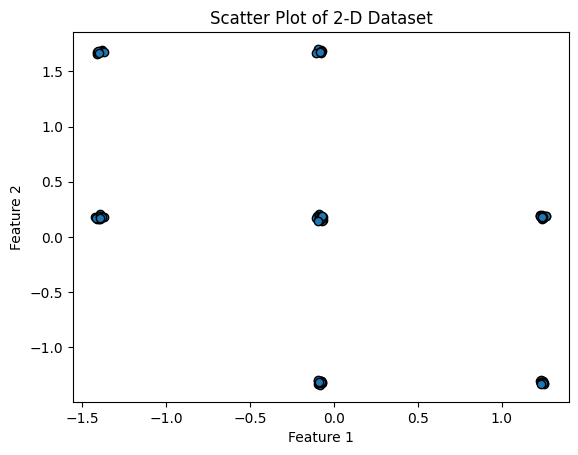

In [16]:
plt.scatter(data[:,0], data[:,1], edgecolor='k')
plt.title('Scatter Plot of 2-D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# TASK 4.3.1

In [23]:
gmm = GaussianMixture(n_components=7)
gmm.fit(data)
labels = gmm.predict(data)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


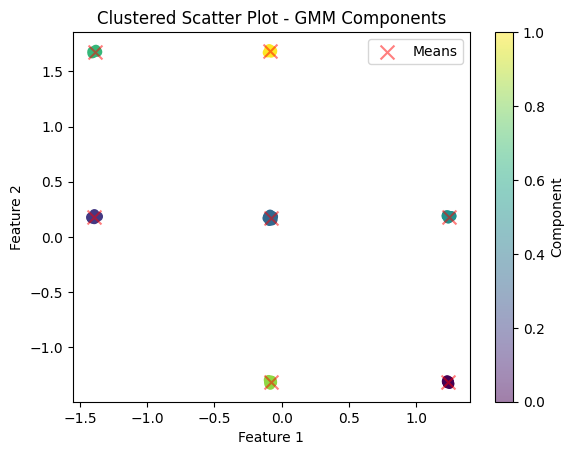

In [32]:
plt.scatter(data[:,0], data[:,1], c=labels,cmap='viridis')
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], c='r', s=100, alpha=0.5,marker='x',label='Means')
plt.title('Clustered Scatter Plot - GMM Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='Component')
plt.show()

# TASK 4.3.2

In [34]:
def create_sample(num_components, means, covariances, num_samples):
    gmm = GaussianMixture(n_components=num_components)
    gmm.means_ = means
    gmm.covariances_ = covariances
    gmm.weights_ = np.ones(num_components) / num_components
    return gmm.sample(num_samples)

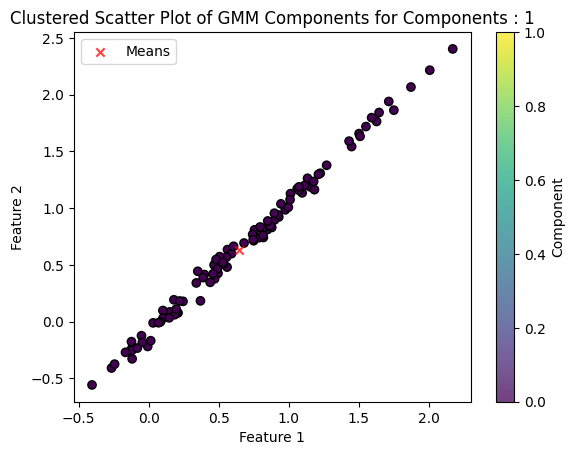

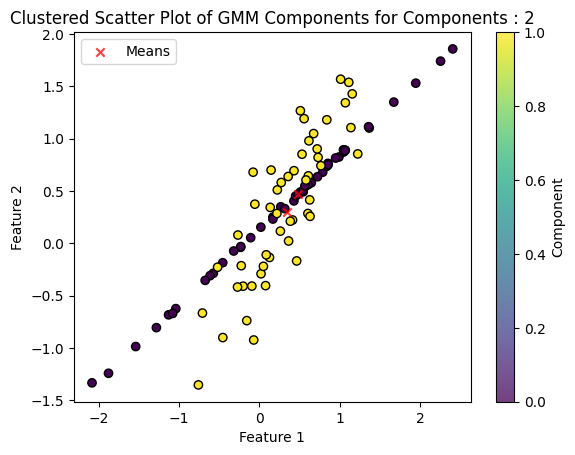

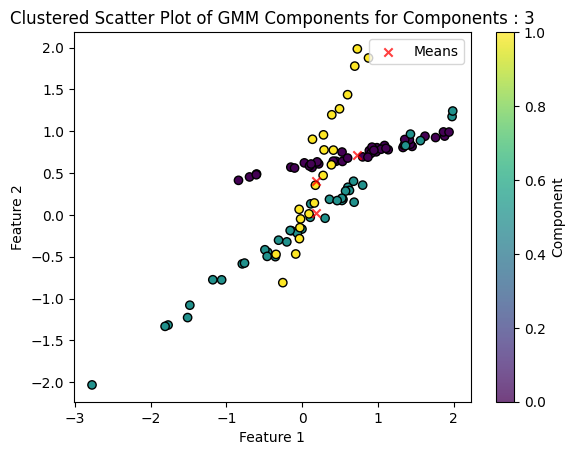

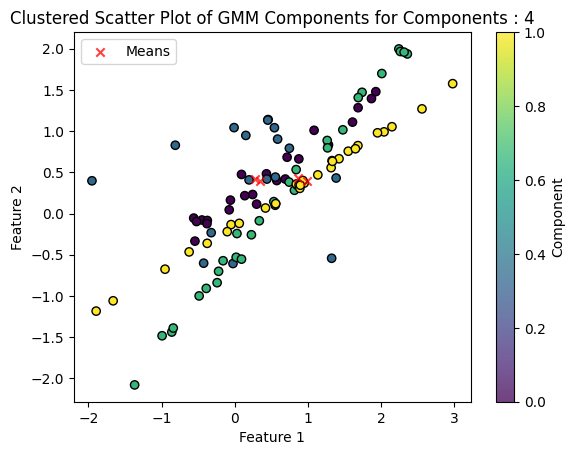

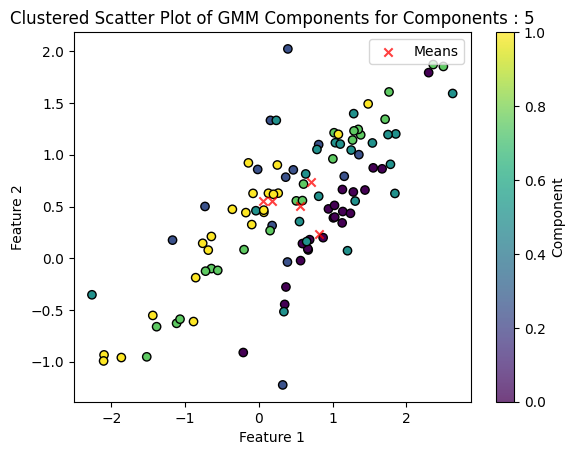

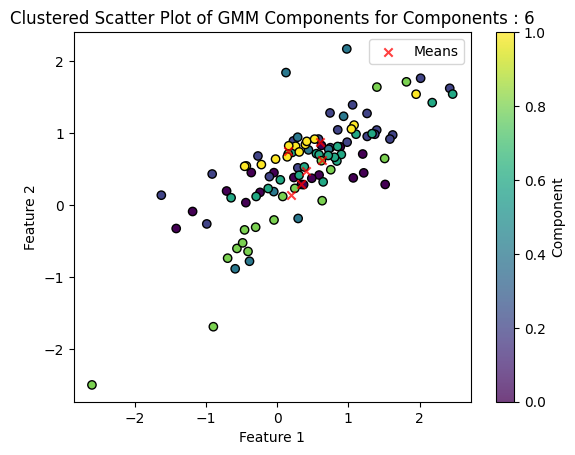

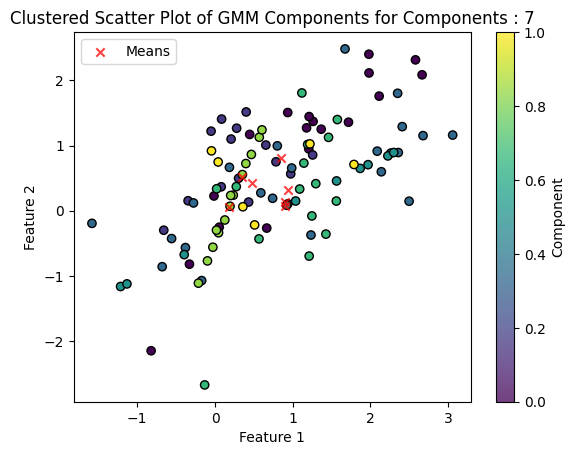

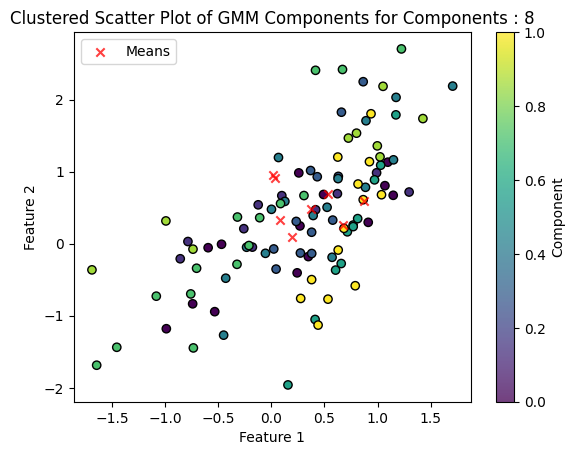

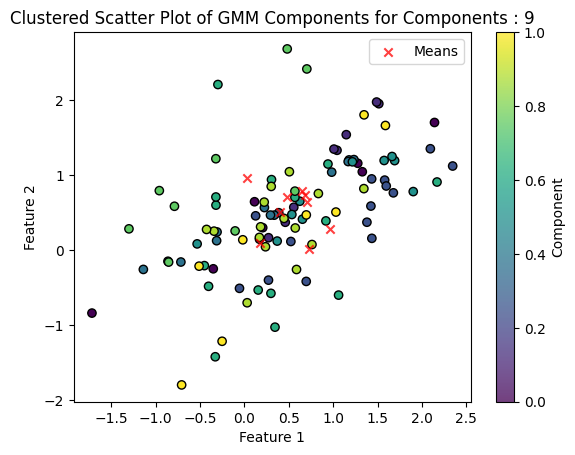

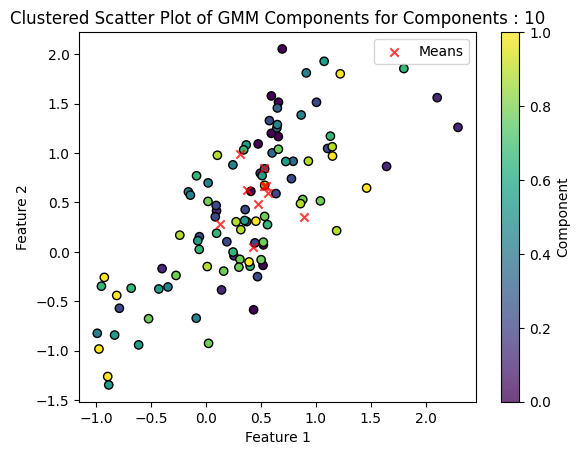

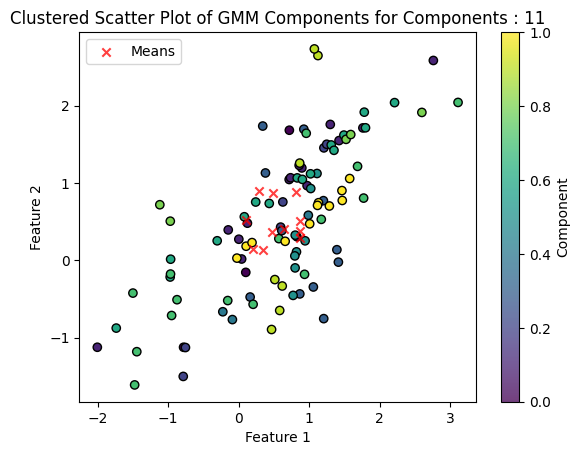

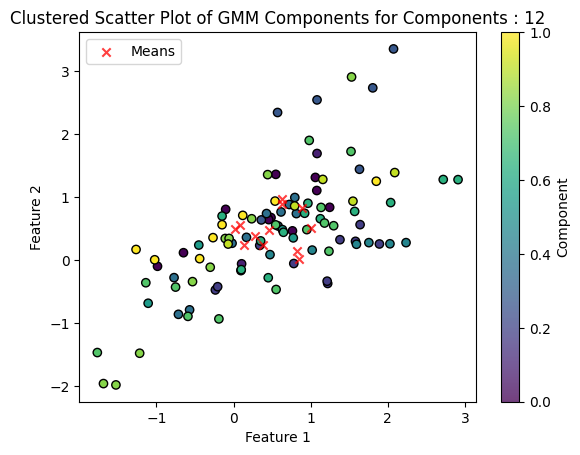

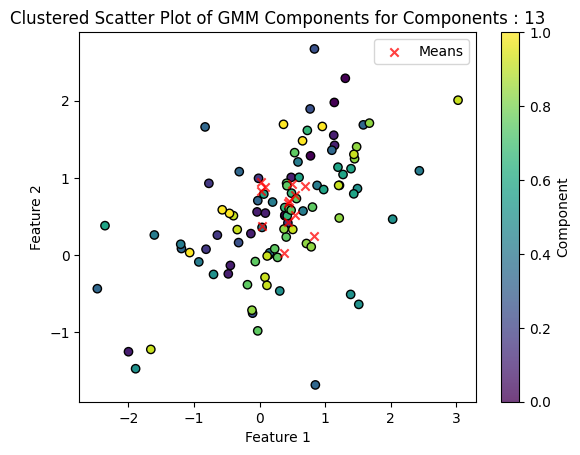

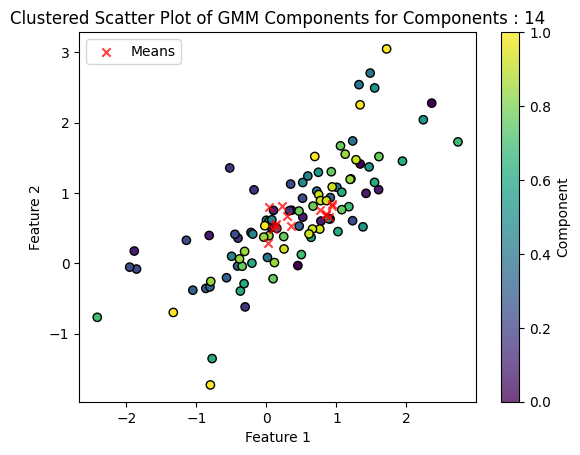

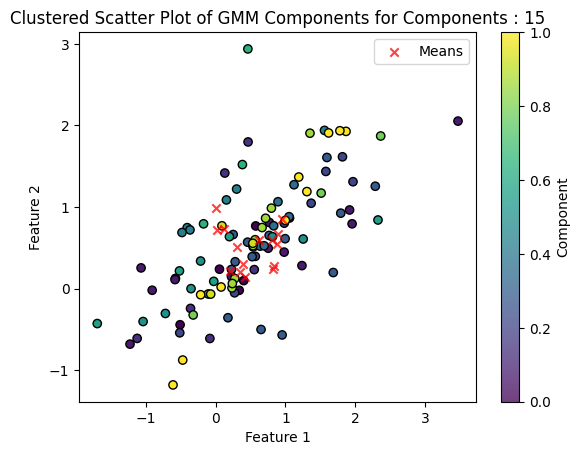

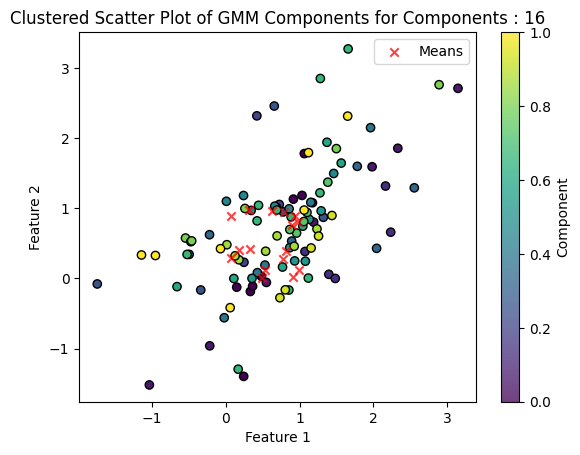

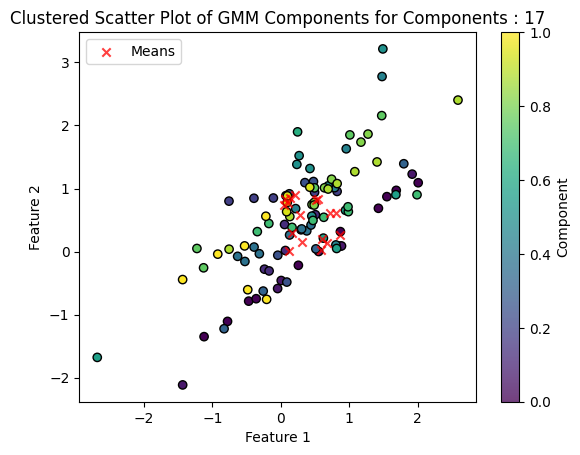

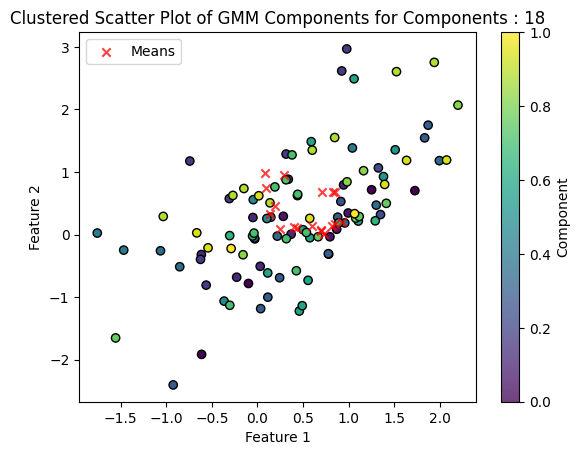

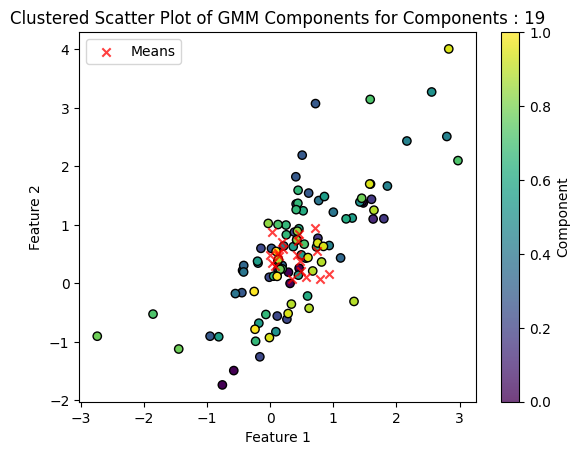

In [50]:
max_components = 20
for n_components in range(1, max_components):
    n_samples = 100
    means = np.random.rand(n_components, 2)
    covariances = np.empty((n_components, 2, 2))

    for i in range(n_components):
        X = np.random.rand(2, 2)
        covariances[i] = np.dot(X.T, X)

    sample_data, labels = create_sample(n_components, means, covariances, n_samples)
    # print(sample_data.shape)
    plt.scatter(sample_data[:, 0], sample_data[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.scatter(means[:, 0], means[:, 1], c='red', alpha=0.75, marker='x', label='Means')
    plt.title(f'Clustered Scatter Plot of GMM Components for Components : {n_components}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.colorbar(label='Component')
    plt.show()

In the graphs above, the means of the data sampled from the distribution are indicated, and the data points of each cluster are indicated in a different color. As can be observed, much of the data is located along the graph's diagonals, which is presumably due to the selection of our weights.